In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab 
from matplotlib.pylab import rcParams
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\\python\\Titanic_ML\\co2_emission\\MER_T12_06.csv')

In [3]:
df.shape

(5094, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
MSN             5094 non-null object
YYYYMM          5094 non-null int64
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


In [5]:
df.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [7]:
date=lambda x: pd.to_datetime(x, format='%Y%m', errors='coerce')
df=pd.read_csv('D:\\python\\Titanic_ML\\co2_emission\\MER_T12_06.csv', parse_dates=['YYYYMM'], index_col='YYYYMM',
              date_parser=date)

In [8]:
df.head(10)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5094 entries, 1973-01-01 to 2016-07-01
Data columns (total 5 columns):
MSN             5094 non-null object
Value           5094 non-null object
Column_Order    5094 non-null int64
Description     5094 non-null object
Unit            5094 non-null object
dtypes: int64(1), object(4)
memory usage: 238.8+ KB


In [10]:
ts=df[pd.Series(pd.to_datetime(df.index, errors='coerce')).notnull().values]

In [11]:
ts.head(15)

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-06-01,CLEIEUS,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-07-01,CLEIEUS,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-08-01,CLEIEUS,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-09-01,CLEIEUS,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [13]:
ts.dtypes

MSN             object
Value           object
Column_Order     int64
Description     object
Unit            object
dtype: object

In [19]:
ts['Value']=pd.to_numeric(ts.Value, errors='coerce')
ts.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [24]:
ts.dropna(inplace=True)

In [25]:
Energy_source=ts.groupby('Description')
Energy_source.head()

,MSN,Value,Column_Order,Description,Unit
YYYYMM,,,,,
1973-01-01,CLEIEUS,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,CLEIEUS,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,CLEIEUS,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,CLEIEUS,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-05-01,CLEIEUS,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-01-01,NNEIEUS,12.175,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-02-01,NNEIEUS,11.708,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-03-01,NNEIEUS,13.994,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1973-04-01,NNEIEUS,14.627,2,Natural Gas Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [30]:
co2_per_sorce=ts.groupby('Description')['Value'].sum().sort_values()


In [31]:
co2_per_sorce.index

Index(['Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'],
      dtype='object', name='Description')

In [32]:
col=['Geothermal Energy', 'Non-Biomass Waste', 'Petroleum Coke','Distillate Fuel ',
        'Residual Fuel Oil', 'Petroleum', 'Natural Gas', 'Coal', 'Total Emissions']

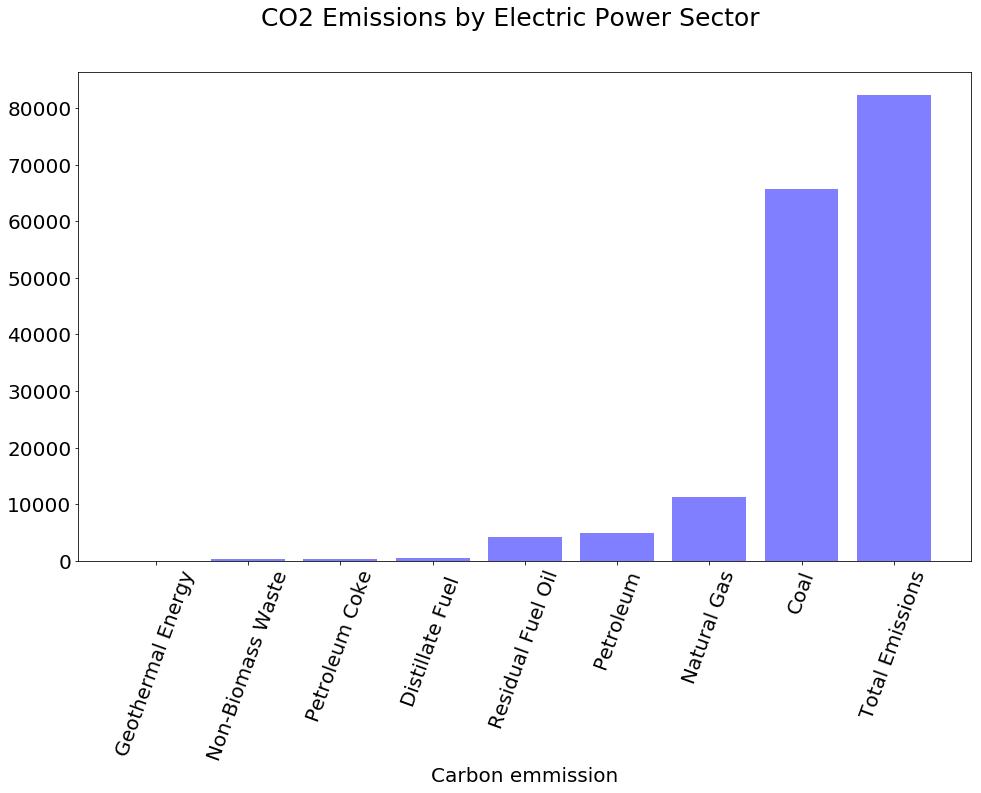

In [36]:
fig=plt.figure(figsize=(16,9))
x_label=col
x_tick=np.arange(len(col))
plt.bar(x_tick, co2_per_sorce, align='center', alpha=0.5, color='b')
fig.suptitle("CO2 Emissions by Electric Power Sector", fontsize= 25)
plt.xticks(x_tick, x_label, rotation=70, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Carbon emmission', fontsize=20)
plt.show()

In [39]:
Emission=ts.iloc[:,1:]
Emission=Emission.groupby(['Description', pd.TimeGrouper('M')])['Value'].sum().unstack(level=0)
mte=Emission['Natural Gas Electric Power Sector CO2 Emissions']
mte.head()

YYYYMM
1973-01-31    12.175
1973-02-28    11.708
1973-03-31    13.994
1973-04-30    14.627
1973-05-31    17.344
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [40]:
mte.tail()

YYYYMM
2016-03-31    40.525
2016-04-30    39.763
2016-05-31    44.210
2016-06-30    53.567
2016-07-31    62.881
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

In [41]:
mte.shape

(523,)

In [44]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

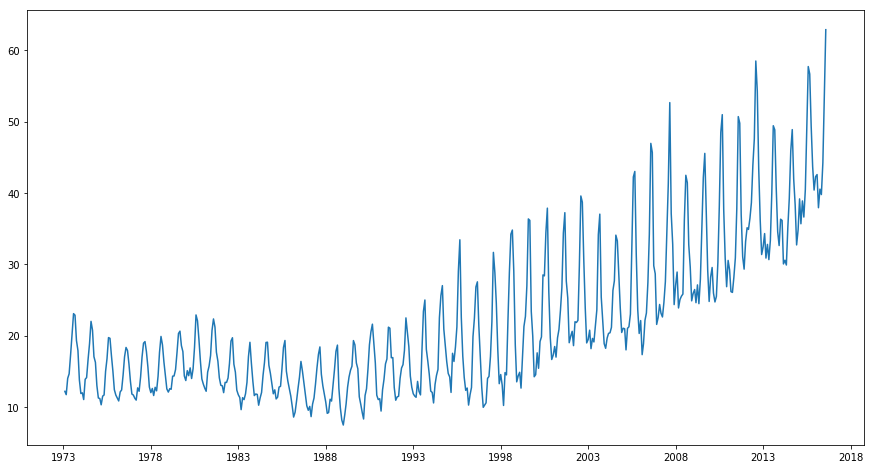

In [50]:
plt.figure(figsize=(15,8))
plt.plot(mte)
plt.show()

In [51]:
def TestStationaryPlot(ts):
    rol_mean=ts.rolling(window=12, center=False).mean()
    rol_std=ts.rolling(window=12, center=False).std()
    
    plt.plot(ts, color='blue', label='Original')
    plt.plot(rol_mean, color='red', label='Rolling Mean')
    plt.plot(rol_std, color='black', label='Rolling std')
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    
    plt.xlabel('Time in years', fontsize=25)
    plt.ylabel('Total emission', fontsize=25)
    plt.legend(loc='best', fontsize=25)
    plt.title('Rolling mean & std', fontsize=25)
    plt.show()

In [52]:
def TestStationaryAdfuller(ts, cutoff=0.01):
    ts_test=adfuller(ts, autolag='AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

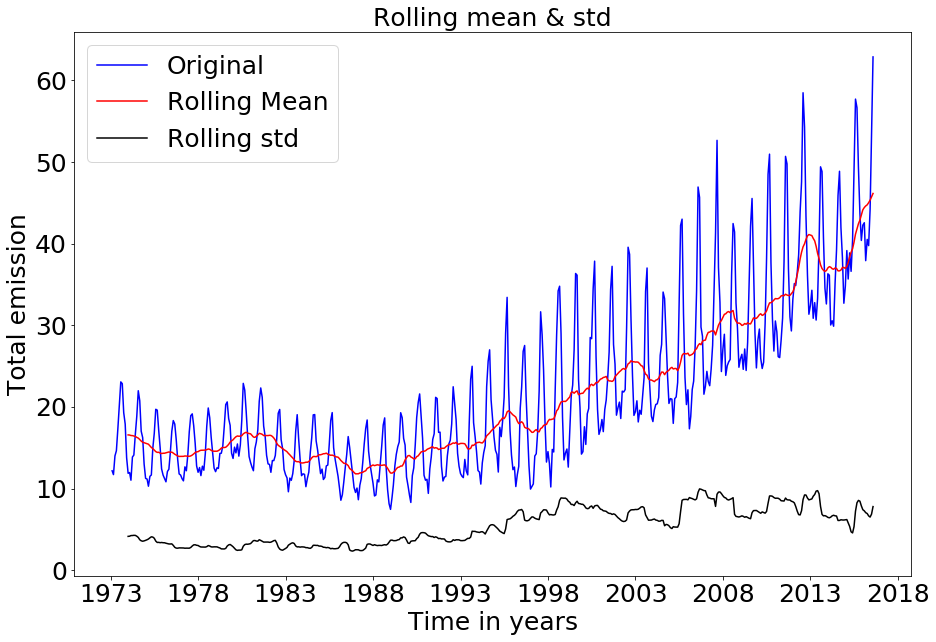

In [54]:
plt.figure(figsize=(15,10))
TestStationaryPlot(mte)

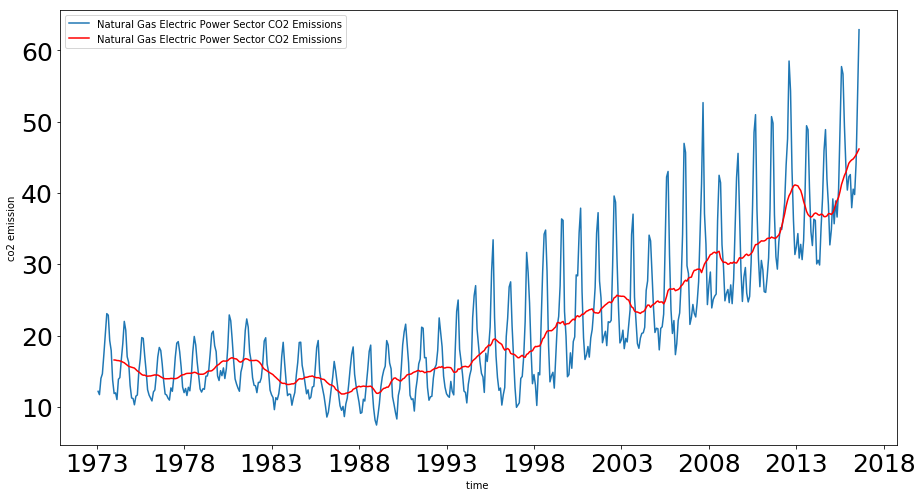

In [59]:
plt.figure(figsize=(15,8))
moving_mte=mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_mte, color='red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("time ")
plt.ylabel("co2 emission")
plt.legend()
plt.show()

In [61]:
mte_moving_avg_diff = mte - moving_mte
mte_moving_avg_diff.head(13)

YYYYMM
1973-01-31         NaN
1973-02-28         NaN
1973-03-31         NaN
1973-04-30         NaN
1973-05-31         NaN
1973-06-30         NaN
1973-07-31         NaN
1973-08-31         NaN
1973-09-30         NaN
1973-10-31         NaN
1973-11-30         NaN
1973-12-31   -4.705333
1974-01-31   -4.594333
Freq: M, Name: Natural Gas Electric Power Sector CO2 Emissions, dtype: float64

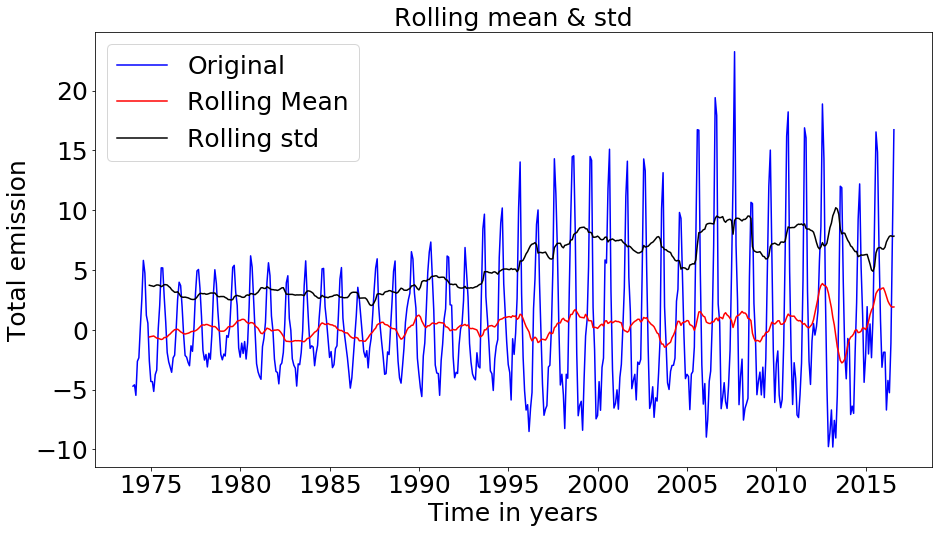

In [64]:
plt.figure(figsize=(15,8))
mte_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(mte_moving_avg_diff)

In [65]:
TestStationaryAdfuller(mte_moving_avg_diff)

Test Statistic                  -5.138977
p-value                          0.000012
#Lags Used                      19.000000
Number of Observations Used    492.000000
Critical Value (1%)             -3.443711
Critical Value (5%)             -2.867432
Critical Value (10%)            -2.569908
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [71]:
import io
from statsmodels.tsa.stattools import coint, adfuller

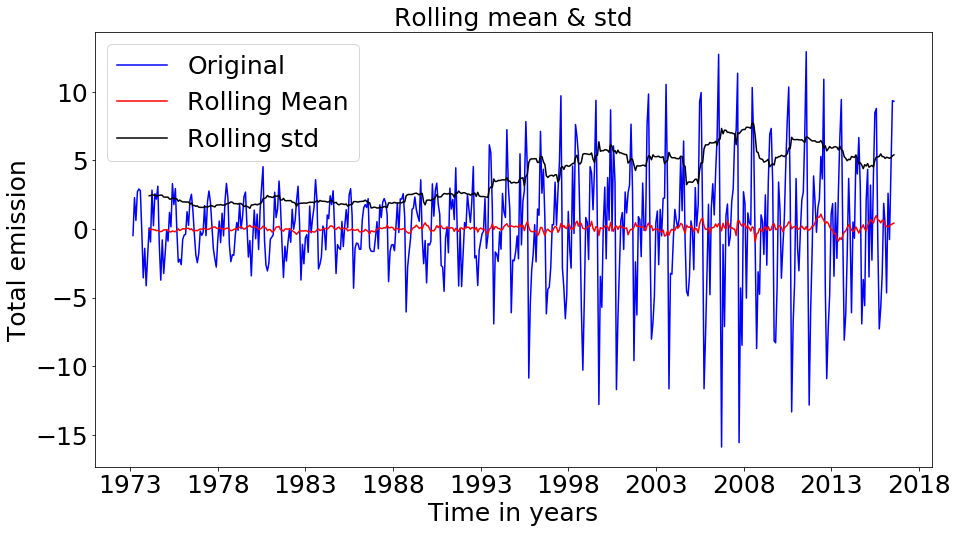

In [85]:
plt.figure(figsize=(15,8))
mte_first_differnce=mte-mte.shift(1)
TestStationaryPlot(mte_first_differnce.dropna(inplace=False))

In [87]:
TestStationaryAdfuller(mte_first_differnce.dropna(inplace=False))

Test Statistic                  -5.435116
p-value                          0.000003
#Lags Used                      18.000000
Number of Observations Used    503.000000
Critical Value (1%)             -3.443418
Critical Value (5%)             -2.867303
Critical Value (10%)            -2.569840
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


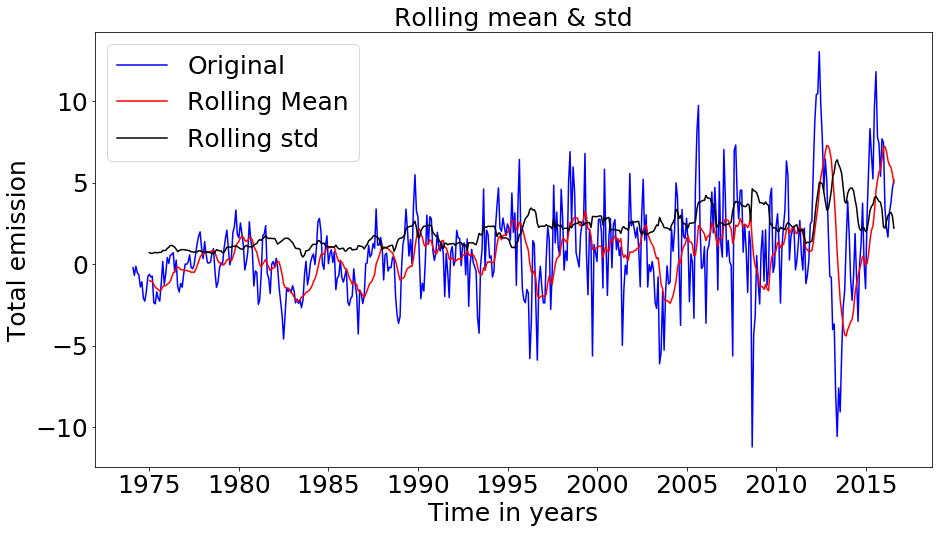

Test Statistic                  -4.412396
p-value                          0.000282
#Lags Used                      13.000000
Number of Observations Used    497.000000
Critical Value (1%)             -3.443576
Critical Value (5%)             -2.867373
Critical Value (10%)            -2.569877
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [90]:
plt.figure(figsize=(15,8))

mte_seasonal_diff=mte-mte.shift(12)
TestStationaryPlot(mte_seasonal_diff.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_diff.dropna(inplace=False))

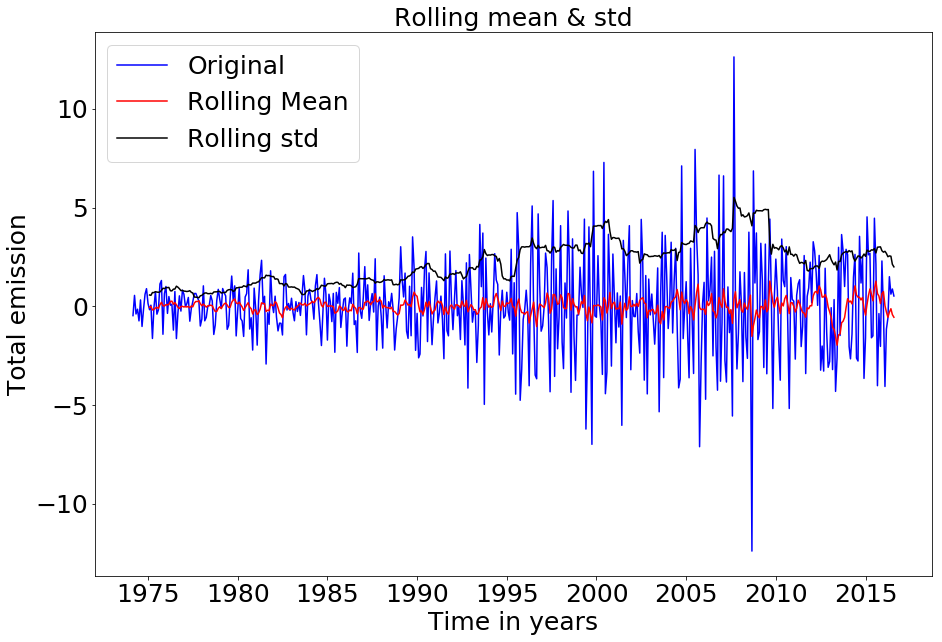

Test Statistic                -1.009743e+01
p-value                        1.081539e-17
#Lags Used                     1.200000e+01
Number of Observations Used    4.970000e+02
Critical Value (1%)           -3.443576e+00
Critical Value (5%)           -2.867373e+00
Critical Value (10%)          -2.569877e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [94]:
plt.figure(figsize=(15,10))
mte_seasonal_first_diff=mte_first_differnce-mte_first_differnce.shift(12)
TestStationaryPlot(mte_seasonal_first_diff.dropna(inplace=False))
TestStationaryAdfuller(mte_seasonal_first_diff.dropna(inplace=False))

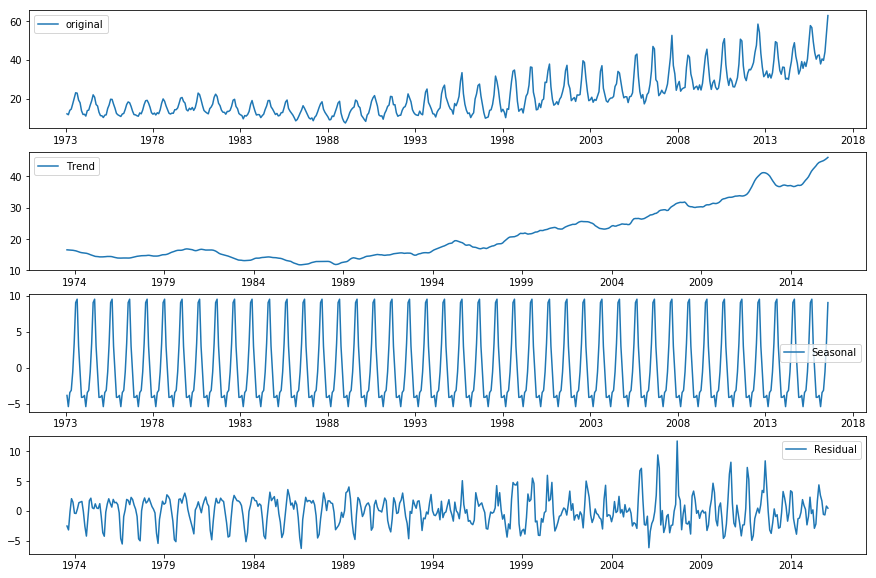

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(mte)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(15,10))

plt.subplot(411)
plt.plot(mte, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.show()


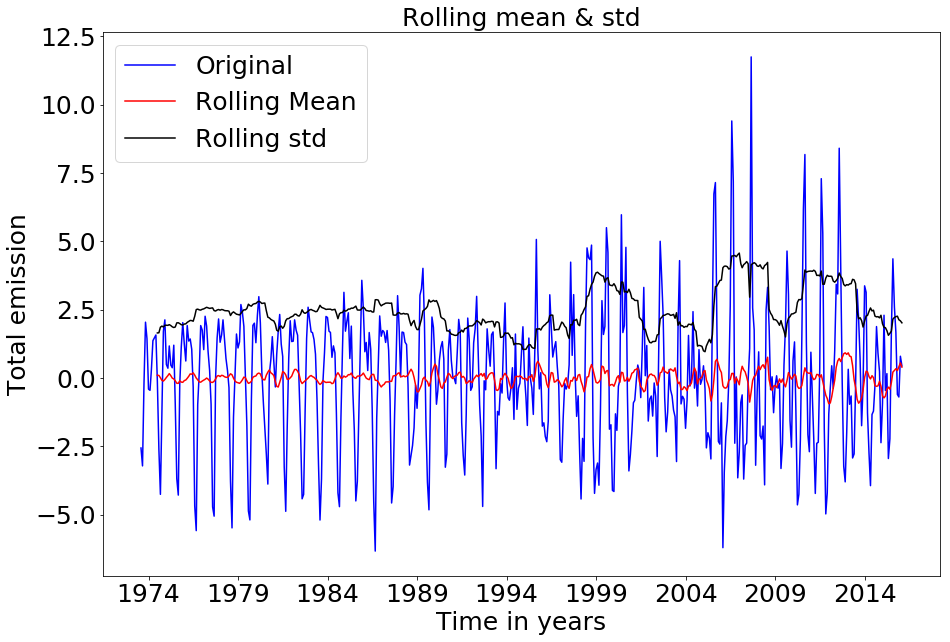

Test Statistic                -8.547084e+00
p-value                        9.439345e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.910000e+02
Critical Value (1%)           -3.443739e+00
Critical Value (5%)           -2.867444e+00
Critical Value (10%)          -2.569915e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [99]:
plt.figure(figsize=(15,10))
mte_decompose=residual
TestStationaryPlot(mte_decompose.dropna(inplace=False))
TestStationaryAdfuller(mte_decompose.dropna(inplace=False))

<Figure size 1080x720 with 0 Axes>

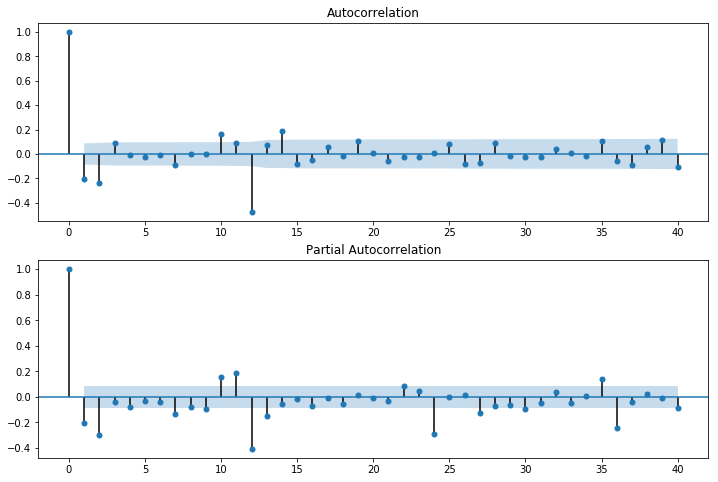

In [101]:
plt.figure(figsize=(15,10))

fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(mte_seasonal_first_diff.iloc[13:], lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(mte_seasonal_first_diff.iloc[13:], lags=40, ax=ax2)

In [102]:
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q)) 
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [103]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(mte,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [104]:
mod = sm.tsa.statespace.SARIMAX(mte, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                          Statespace Model Results                                         
Dep. Variable:     Natural Gas Electric Power Sector CO2 Emissions   No. Observations:                  523
Model:                              SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -997.777
Date:                                             Sun, 23 Sep 2018   AIC                           2003.553
Time:                                                     22:08:08   BIC                           2020.380
Sample:                                                 01-31-1973   HQIC                          2010.158
                                                      - 07-31-2016                                         
Covariance Type:                                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------

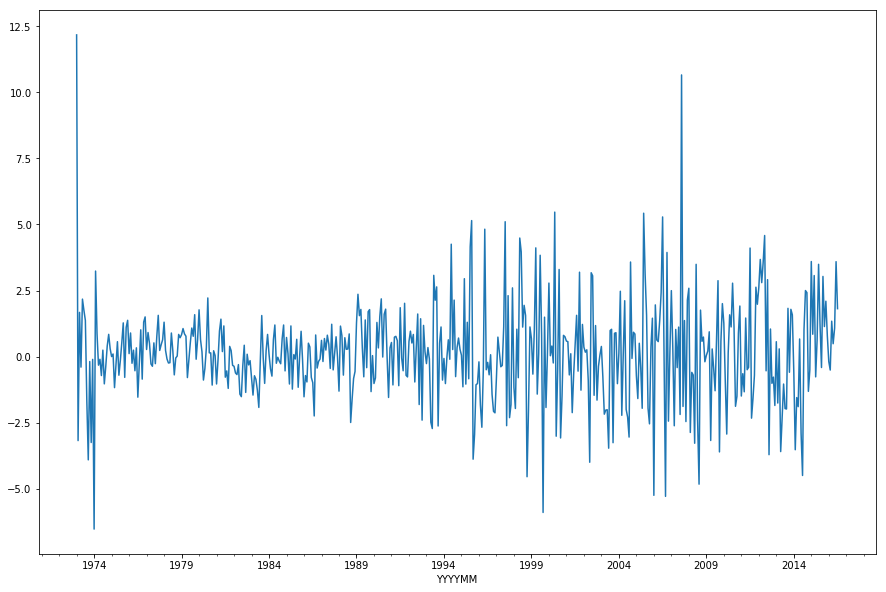

In [106]:
plt.figure(figsize=(15,10))

results.resid.plot()
